In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


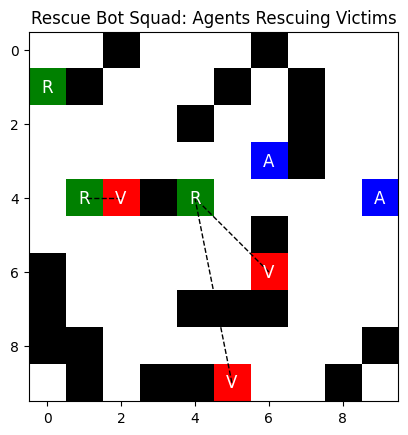

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Maze setup
def create_maze(rows=10, cols=10, num_victims=3, num_agents=2):
    maze = np.zeros((rows, cols), dtype=int)  # 0: path, 1: wall
    # Randomly place walls
    for _ in range(rows * cols // 4):
        i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        maze[i][j] = 1
    # Place victims
    victims = []
    for _ in range(num_victims):
        i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        while maze[i][j] != 0:
            i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        victims.append((i, j))
        maze[i][j] = 2  # 2: victim
    # Place agents
    agents = []
    for _ in range(num_agents):
        i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        while maze[i][j] != 0:
            i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        agents.append((i, j))
        maze[i][j] = 3  # 3: agent
    # Place rescue zones
    rescue_zones = []
    for _ in range(num_victims):
        i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        while maze[i][j] != 0:
            i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        rescue_zones.append((i, j))
        maze[i][j] = 4  # 4: rescue zone
    return maze, agents, victims, rescue_zones

# BFS pathfinding
def bfs_path(maze, start, target):
    rows, cols = maze.shape
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([(start, [])])
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    while queue:
        (i, j), path = queue.popleft()
        if (i, j) == target:
            return path + [(i, j)]
        for di, dj in directions:
            ni, nj = i + di, j + dj
            if 0 <= ni < rows and 0 <= nj < cols and not visited[ni][nj] and maze[ni][nj] != 1:
                visited[ni][nj] = True
                queue.append(((ni, nj), path + [(i, j)]))
    return []

# Assign victims to rescue zones (simple logic: nearest)
def assign_rescue(maze, victims, rescue_zones):
    assignments = {}
    for v in victims:
        best_zone = None
        min_dist = float('inf')
        for rz in rescue_zones:
            path = bfs_path(maze, v, rz)
            if path and len(path) < min_dist:
                min_dist = len(path)
                best_zone = rz
        assignments[v] = best_zone
    return assignments

# Visualization
def visualize(maze, agents, victims, rescue_zones, assignments):
    fig, ax = plt.subplots()
    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'red', 'blue', 'green'])
    bounds = [0, 1, 2, 3, 4, 5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    ax.imshow(maze, cmap=cmap, norm=norm)
    for a in agents:
        ax.text(a[1], a[0], 'A', ha='center', va='center', color='white', fontsize=12)
    for v in victims:
        ax.text(v[1], v[0], 'V', ha='center', va='center', color='white', fontsize=12)
    for rz in rescue_zones:
        ax.text(rz[1], rz[0], 'R', ha='center', va='center', color='white', fontsize=12)
    for v, rz in assignments.items():
        if rz:
            ax.plot([v[1], rz[1]], [v[0], rz[0]], 'k--', linewidth=1)
    ax.set_title("Rescue Bot Squad: Agents Rescuing Victims")
    plt.show()

# Main execution
if __name__ == "__main__":
    maze, agents, victims, rescue_zones = create_maze()
    assignments = assign_rescue(maze, victims, rescue_zones)
    visualize(maze, agents, victims, rescue_zones, assignments)
